Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

Set all the Constants

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

Import data into tensorflow dataset object

In [12]:
import zipfile
import os
import tensorflow as tf

# Step 1: Unzip the file from Google Drive to a local directory
zip_path = '/content/drive/MyDrive/DL_Project/plant.zip'
new_zip_path =

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('temp_dir')

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'temp_dir',
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 20638 files belonging to 1 classes.


In [18]:
class_names = dataset.class_names
class_names


['PlantVillage']

In [19]:
import os

# Path to the dataset directory
dataset_dir = '/content/temp_dir/PlantVillage'

# Get the list of subdirectories (class names)
class_names = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]

print(class_names)


['Tomato_Late_blight', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Potato___healthy', 'Tomato__Tomato_mosaic_virus', 'Pepper__bell___healthy', 'Tomato_healthy', 'Potato___Late_blight', 'Pepper__bell___Bacterial_spot', 'Tomato__Target_Spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Early_blight', 'Tomato_Leaf_Mold', 'Tomato_Bacterial_spot', 'Tomato_Septoria_leaf_spot', 'Potato___Early_blight']


In [20]:
len(dataset)

645

In [21]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Visualize some of the images from our dataset

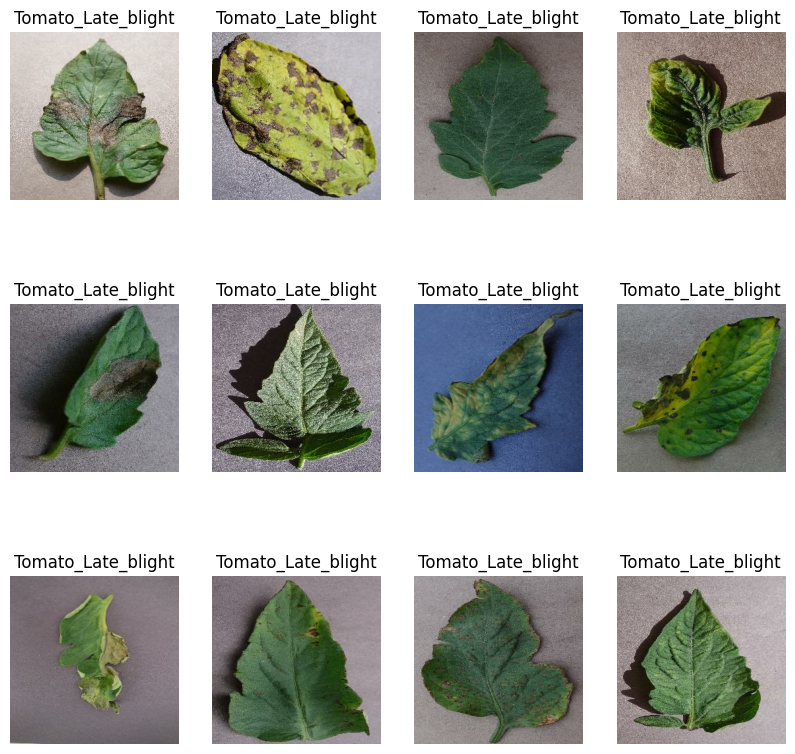

In [22]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

Function to Split Dataset
Dataset should be bifurcated into 3 subsets, namely: **bold text**

Training: Dataset to be used while training
Validation: Dataset to be tested against while training
Test: Dataset to be tested against after we trained a model

In [23]:
len(dataset)

645

In [24]:
train_size = 0.8
len(dataset)*train_size

516.0

In [29]:
train_ds = dataset.take(630)
len(train_ds)

630

In [30]:
test_ds = dataset.skip(630)
len(test_ds)

15